In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data
data= pd.read_csv('MLPHUS.csv')

data.head()
#data.rename(columns={'POWER':'Power'},inplace=True)
#data.rename(columns={'SCAN SPEED(MM/S)':'Scan Speed'},inplace=True)
#data.rename(columns={'SPOT SIZE(UM)':'Spot Size'},inplace=True)


,Mod. VED,Marangoni No.,d/hp,Mode
0,4.899559,1592.613618,0.123289,0
1,8.846426,0.417846,0.054706,0
2,9.073257,11706.052520,0.237527,0
3,10.207415,16368.669070,0.282055,0
4,10.615711,0.457727,0.059800,0


In [3]:
data1=data
data1.describe()

,Mod. VED,Marangoni No.,d/hp,Mode
count,100.000000,100.000000,100.000000,100.000000
mean,44.365981,71258.952453,0.411973,0.520000
std,40.450412,77862.585191,0.256538,0.502117
min,4.899559,0.417846,0.054706,0.000000
25%,19.307086,20420.899783,0.251060,0.000000
50%,30.882069,46197.330230,0.333307,1.000000
75%,51.470115,98368.583385,0.554521,1.000000
max,195.982362,486963.713100,1.384207,1.000000


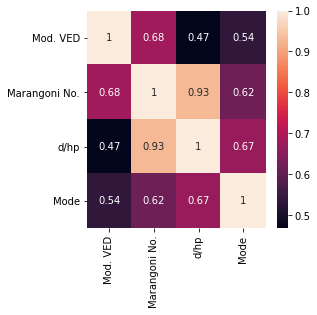

In [4]:
plt.figure(figsize=(4,4))
sns.heatmap(data1.corr(),annot=True);

In [5]:
# Separating input and output features
x = data1.loc[:, data1.columns != 'Mode']  # independent variables

y = data1.loc[:, data1.columns == 'Mode'] 

# Test Train Split
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x,y,test_size=0.2,random_state=70)



In [6]:
from sklearn.ensemble import RandomForestClassifier
regm= RandomForestClassifier(n_estimators=1000,random_state=0)
regm.fit(xtr,ytr)
regm.score(xtr,ytr)
regm.score(xte,yte)

<ipython-input-6-0ca9063afd51>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm.fit(xtr,ytr)


1.0

In [7]:
regm.feature_importances_

array([0.30471831, 0.39256003, 0.30272165])

In [8]:
!pip install xgboost 
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1,n_estimators=1250)
xgb.fit(xtr,ytr)
xgb.score(xtr,ytr)
xgb.score(xte,yte)
xgb.feature_importances_

array([0.6014141 , 0.3208887 , 0.07769726], dtype=float32)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=7)
lr.fit(xtr, ytr)
lr.score(xtr,ytr)
lr.score(xte,yte)

M:\ANACONDA\SETUP\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0

In [10]:
lr.coef_

array([[ 3.65174295e-02,  6.45474027e-05, -6.41861645e-01]])

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=4, random_state=1, shuffle = True)
import warnings
warnings.filterwarnings('ignore')

In [12]:
results = cross_val_score(regm, xtr, ytr , cv=kfold, scoring='accuracy')
print(results)

[0.9 0.9 0.8 0.9]


In [13]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.500% (4.330%)


In [14]:
results = cross_val_score(xgb, xtr, ytr , cv=kfold, scoring='accuracy')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.9  0.9  0.85 0.9 ]
Accuracy: 88.750% (2.165%)


In [15]:
results = cross_val_score(lr, xtr, ytr , cv=kfold, scoring='accuracy')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.55 0.85 0.75 0.85]
Accuracy: 75.000% (12.247%)


In [16]:
pm=pd.read_csv('USC10030PI.csv')

In [17]:
xgb.predict(pm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
pm=pd.read_csv('USC10050PI.csv')

In [19]:
xgb.predict(pm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
pm=pd.read_csv('USC10070PI.csv')

In [21]:
xgb.predict(pm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score,roc_curve,accuracy_score

In [23]:
print(accuracy_score(ytr,lr.predict(xtr)))
print(accuracy_score(ytr,regm.predict(xtr)))
print(accuracy_score(ytr,xgb.predict(xtr)))
print(accuracy_score(yte,lr.predict(xte)))
print(accuracy_score(yte,regm.predict(xte)))
print(accuracy_score(yte,xgb.predict(xte)))

0.875
0.9875
0.9875
1.0
1.0
0.95


In [24]:
print(precision_score(ytr,lr.predict(xtr)))
print(precision_score(ytr,regm.predict(xtr)))
print(precision_score(ytr,xgb.predict(xtr)))
print(precision_score(yte,lr.predict(xte)))
print(precision_score(yte,regm.predict(xte)))
print(precision_score(yte,xgb.predict(xte)))

0.875
0.975609756097561
0.975609756097561
1.0
1.0
0.9230769230769231


In [25]:
print(recall_score(ytr,lr.predict(xtr)))
print(recall_score(ytr,regm.predict(xtr)))
print(recall_score(ytr,xgb.predict(xtr)))
print(recall_score(yte,lr.predict(xte)))
print(recall_score(yte,regm.predict(xte)))
print(recall_score(yte,xgb.predict(xte)))

0.875
1.0
1.0
1.0
1.0
1.0


In [26]:
print(f1_score(ytr,lr.predict(xtr)))
print(f1_score(ytr,regm.predict(xtr)))
print(f1_score(ytr,xgb.predict(xtr)))
print(f1_score(yte,lr.predict(xte)))
print(f1_score(yte,regm.predict(xte)))
print(f1_score(yte,xgb.predict(xte)))

0.875
0.9876543209876543
0.9876543209876543
1.0
1.0
0.9600000000000001


In [27]:
from sklearn.metrics import confusion_matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

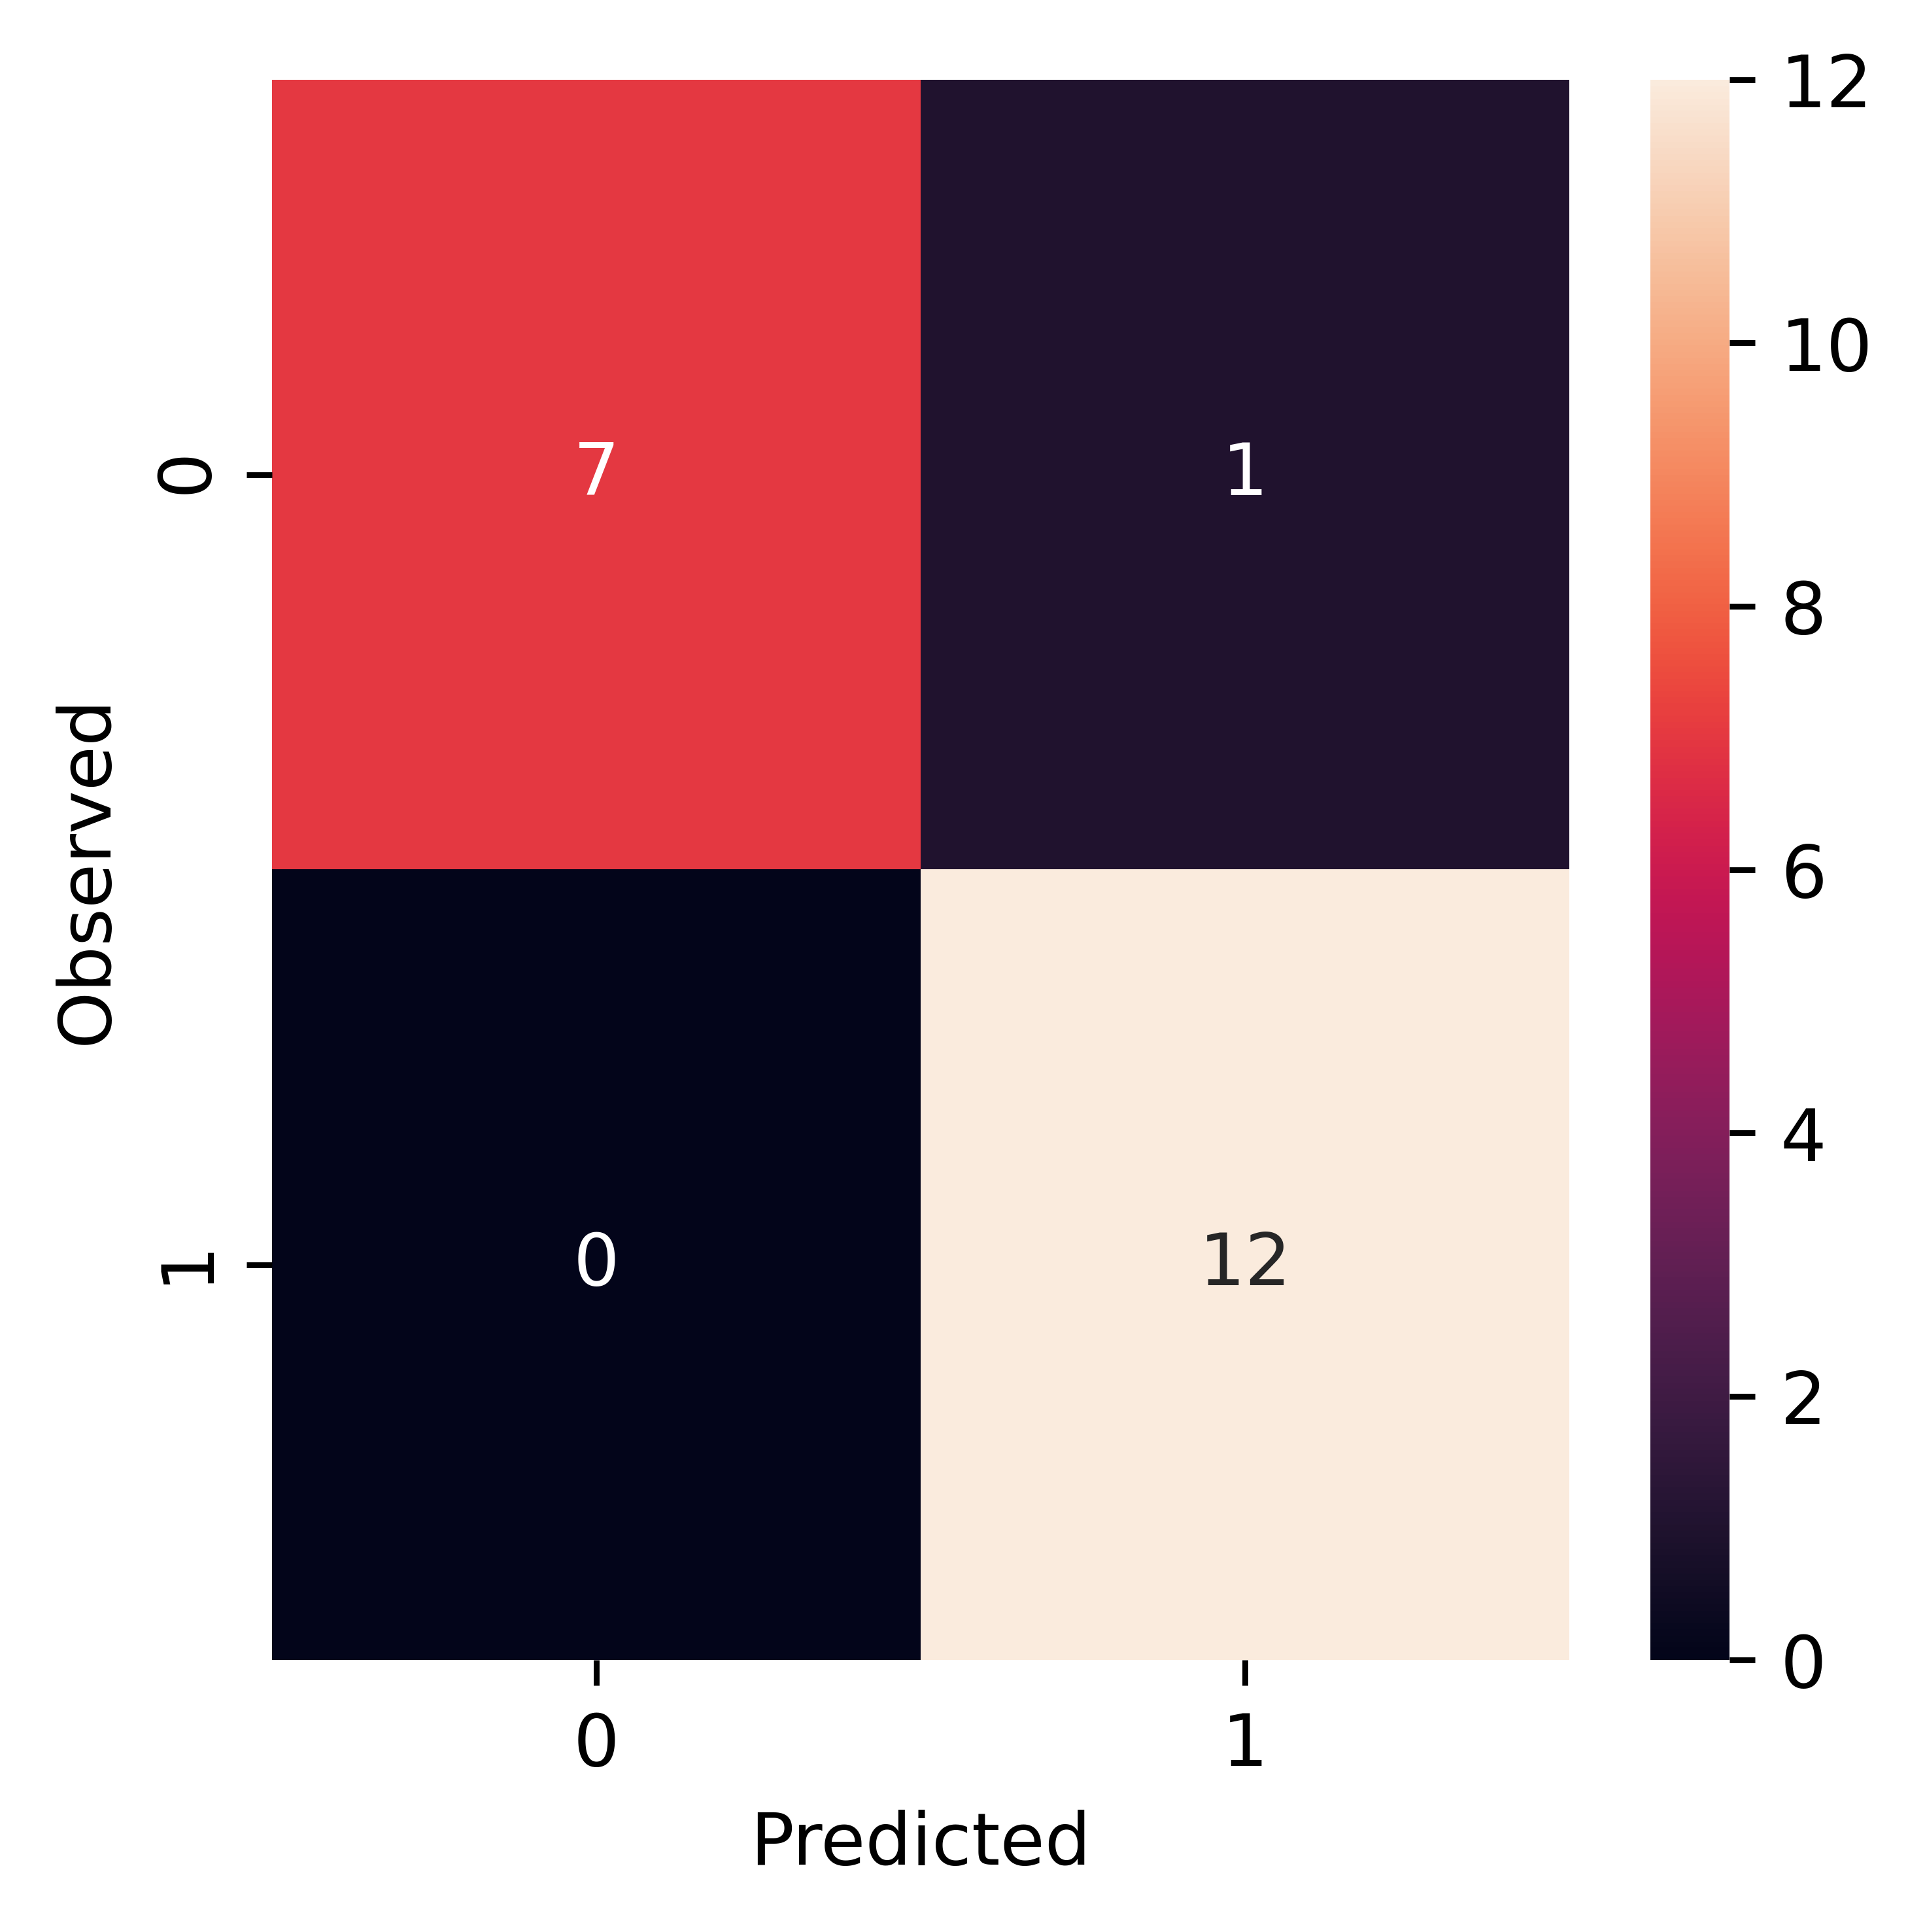

In [28]:
plt.figure(figsize=(4,4),dpi=800)
draw_cm(yte,xgb.predict(xte))

In [33]:
results = cross_val_score(regm, x, y , cv=kfold, scoring='accuracy')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.8  0.88 1.   0.96]
Accuracy: 91.000% (7.681%)
